## Extracting & Reading the Data:

In [71]:
#First to Extract and read our CSV data:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('archive')

import pandas as pd
df = pd.read_csv('archive/Iris.csv')

## Importing Necessary Libraries and Frameworks:

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Getting to know the Data:

In [73]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [74]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [75]:
df = df.drop('Id', axis=1)    #Dropped the ID column as it is not relevant.

In [35]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [76]:
df.isnull().sum()                #This shows that there are no null values in the dataset. which is good.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## PreProcessing:

In [97]:
#We see that all the data are numerical except the labels themselves. So we need to convert the labels into numerical values.
#We can do this by using the LabelEncoder from sklearn.preprocessing library.
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [98]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [99]:
df['Species'].value_counts()

#Keep in mind now our lables are:
#0 = Iris-setosa
#1 = Iris-versicolor
#2 = Iris-virginica

0    50
1    50
2    50
Name: Species, dtype: int64

## Exploratory Data Analysis:

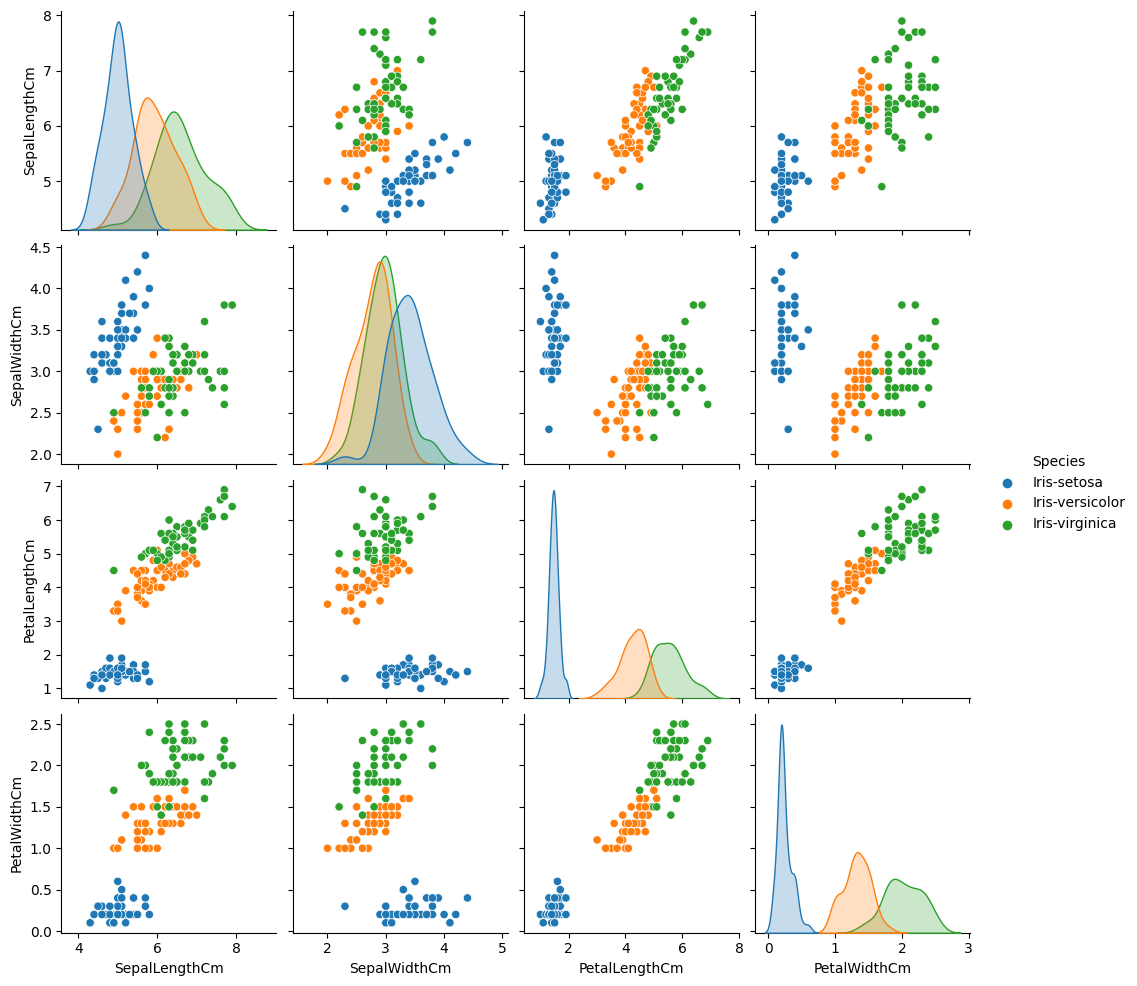

In [80]:
#To map the species column to the species name:
hue_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species'] = df['Species'].map(hue_map)

#Plotting the data:
sns.pairplot(df, hue='Species' , diag_kind='kde')
plt.show()

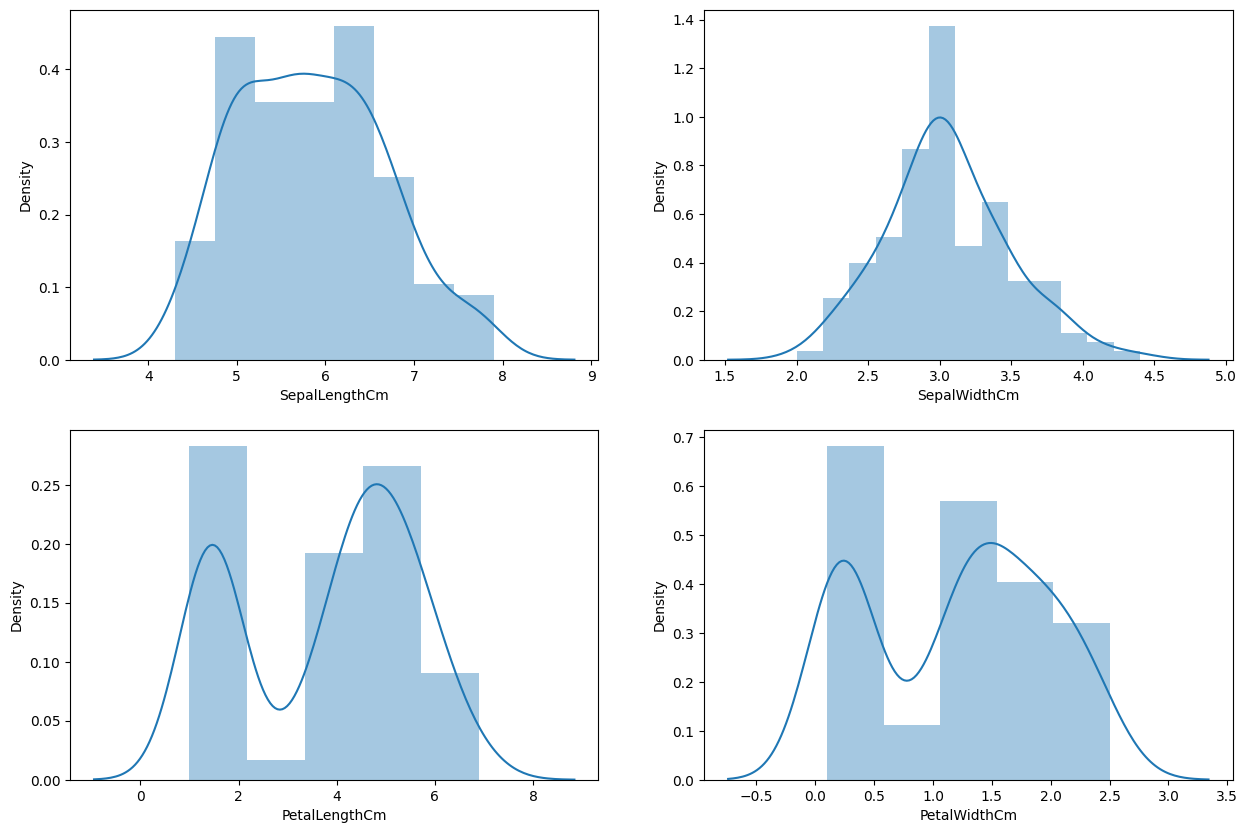

In [81]:
#Plotting a histogram for each feature -aka column- :
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'])
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'])
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'])
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'])
plt.show()

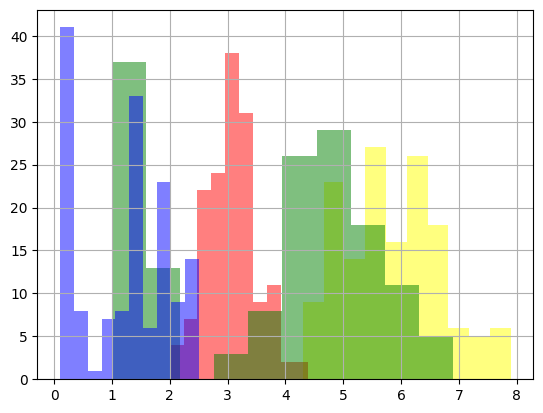

In [82]:
#now to a plot a histogram for all the features together in one plot:
df['SepalLengthCm'].hist(color='yellow', alpha=0.5)
df['SepalWidthCm'].hist(color='red', alpha=0.5)
df['PetalLengthCm'].hist(color='green', alpha=0.5)
df['PetalWidthCm'].hist(color='blue', alpha=0.5)
plt.show()

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000
######################################################################


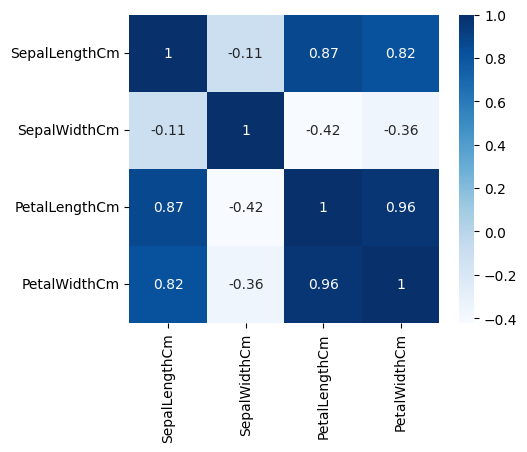

In [83]:
#Correlation Matrix:
correlation_matrix = df.corr()
print(correlation_matrix)
print("#"*70)

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='Blues')
plt.show()

## Data Splitting:

In [101]:
#Change the labels again to numerical values:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]
#Splitting the data into training and testing sets:
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0 , stratify=Y)

In [105]:
#T knwo the shapes:
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)
print("#"*70)

#To know the data types:
print(x_train.dtypes)
print("#"*70)
print(x_test.dtypes)
print("#"*70)
print(y_train.dtypes)
print("#"*70)
print(y_test.dtypes)


Shape of x_train : (105, 4)
Shape of y_train : (105,)
Shape of x_test : (45, 4)
Shape of y_test : (45,)
######################################################################
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object
######################################################################
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object
######################################################################
int64
######################################################################
int64


## Initializing The Helper Functions:

In [148]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
       
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    
        
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
    f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    
       
    
def plot_feature_importances(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        indices = importances.argsort()[::-1]

        plt.figure(figsize=(8, 6))
        plt.title(f'Feature Importances - {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
        plt.show()
    else:
        print(f'{model_name} does not support feature importances.')  

## Linear Regression Model:

In [143]:
logistic_regression_model = LogisticRegression(random_state=0, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logistic_regression_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   random_state=0)

## Decision Tree Model:

In [140]:
decision_tree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

## Random Forest Model:

In [139]:
random_forest_model = RandomForestClassifier(random_state=0, class_weight='balanced')
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

## XGBoost Model:

In [144]:
xgboost_model = XGBClassifier(random_state=0, objective='multi:softmax', num_class=3)
xgboost_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

## Obtaining the Trainning Results for each Model:

Model: Logistic Regression


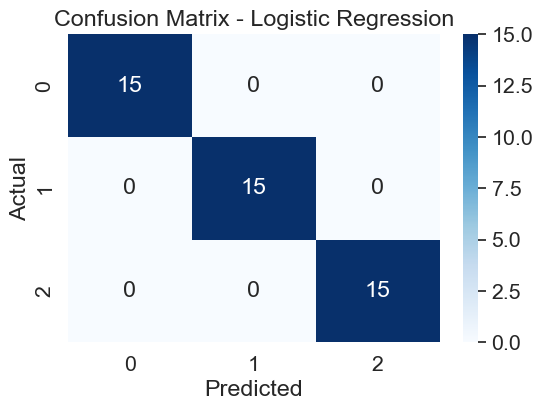

Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Logistic Regression does not support feature importances.
Model: Random Forest


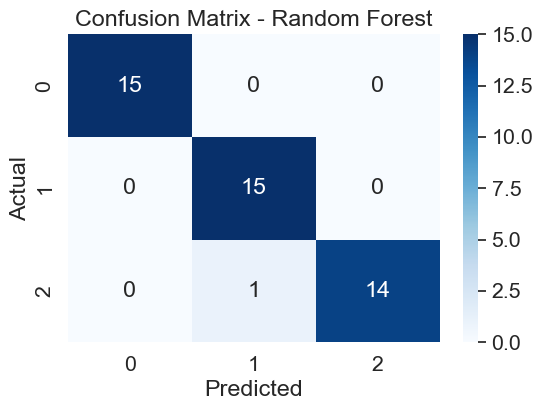

Model: Random Forest
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


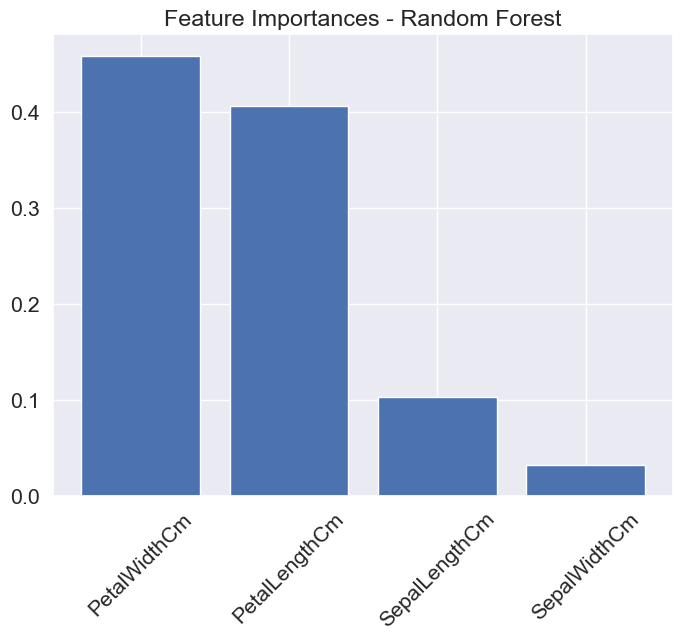

Model: Decision Tree


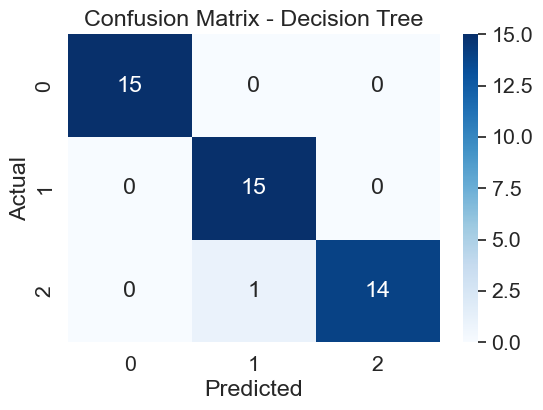

Model: Decision Tree
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


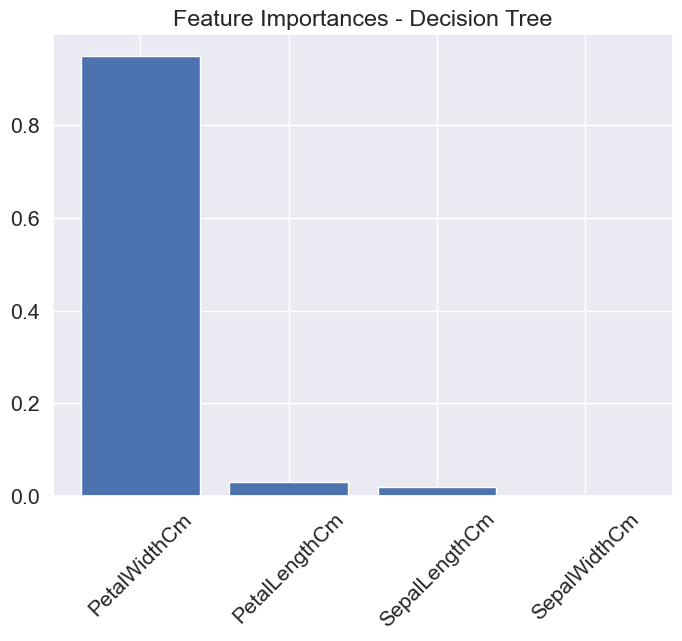

Model: XGBoost


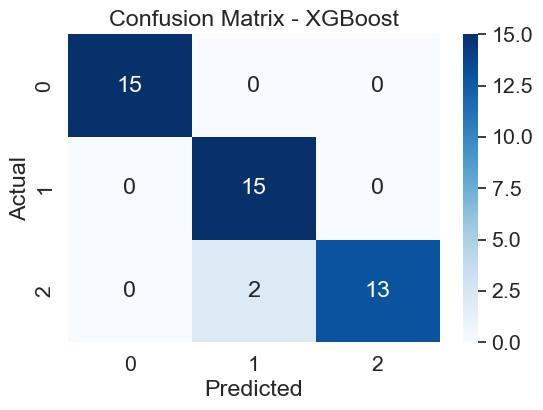

Model: XGBoost
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


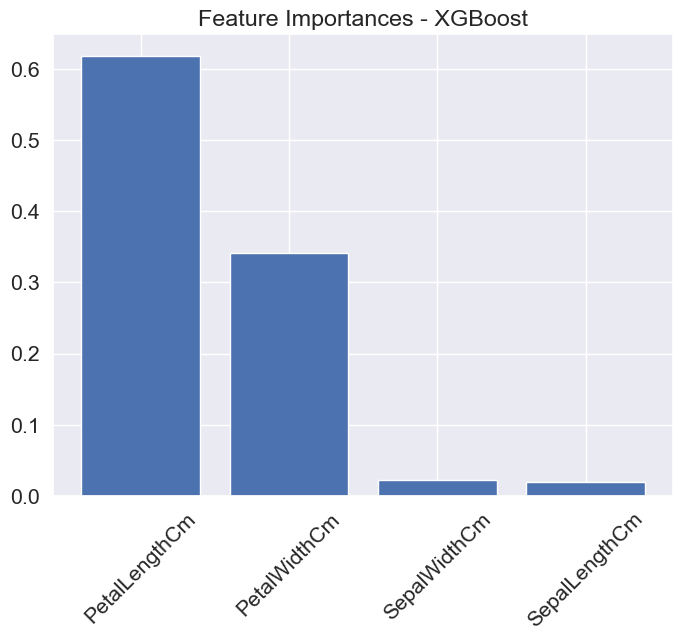

In [149]:
models = {
    'Logistic Regression': logistic_regression_model,
    'Random Forest': random_forest_model,
    'Decision Tree': decision_tree_model,
    'XGBoost': xgboost_model
}

# Evaluate the models
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    y_pred = model.predict(x_test)
    
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    print_metrics(y_test, y_pred, model_name)
    
    plot_feature_importances(model, model_name)          #this will be plotted only for the models that support feature importances.
    
    print("=" * 70)